In [7]:
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from util.functions import Functions
from wrappers.visualizer import Visualizer

path_data = './data'
path_img = path_data + '/imgs'
path_csv = path_data + '/csv'
path_geojson = path_data + '/geojson'
level = 'province'
file_name_p = path_csv + '/covid19-' + level + '.csv'
map_province = path_geojson + '/Italy_NUTS_3.json'

In [8]:
# Read geojson NUTS 2 file
with open(map_province, encoding='utf-8') as map_geojson_p:
    map_json_p = json.load(map_geojson_p)
properties = map_json_p['features'][0]['properties']
properties

{'prov_name': 'Torino',
 'prov_istat_code_num': 1,
 'prov_acr': 'TO',
 'reg_name': 'Piemonte',
 'reg_istat_code': '01',
 'reg_istat_code_num': 1,
 'prov_istat_code': '001'}

In [9]:
df_p = pd.read_csv(file_name_p)
last_date = df_p.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_p.columns
df_p

,data,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,totale_casi,variazione_totale_casi
0,2020-10-23T17:00:00,1,Piemonte,1,Torino,TO,26869,1084
1,2020-10-23T17:00:00,1,Piemonte,2,Vercelli,VC,2060,594
2,2020-10-23T17:00:00,1,Piemonte,3,Novara,NO,4616,216
3,2020-10-23T17:00:00,1,Piemonte,4,Cuneo,CN,6037,354
4,2020-10-23T17:00:00,1,Piemonte,5,Asti,AT,2671,78
...,...,...,...,...,...,...,...,...
144,2020-10-23T17:00:00,9,Toscana,995,In fase di definizione/aggiornamento,NaN,0,0
145,2020-10-23T17:00:00,4,P.A. Trento,996,In fase di definizione/aggiornamento,NaN,0,0
146,2020-10-23T17:00:00,10,Umbria,997,In fase di definizione/aggiornamento,NaN,0,0
147,2020-10-23T17:00:00,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,NaN,0,0


In [10]:
interactive = False

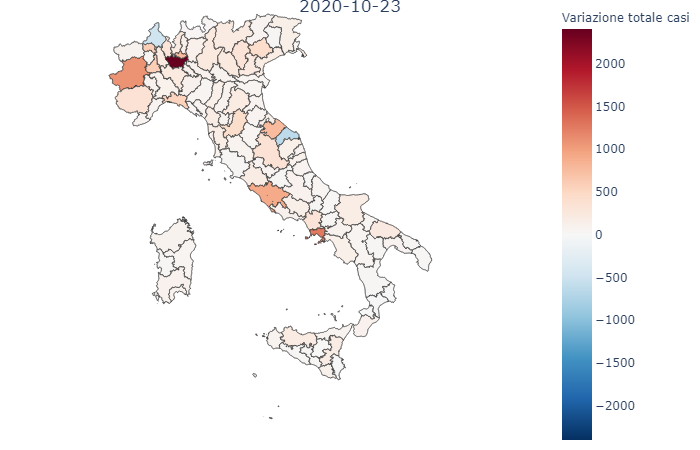

In [11]:
Visualizer.choropleth_go(
    df=df_p,
    geojson=map_json_p,
    locations='denominazione_provincia', 
    color='variazione_totale_casi',
    colorscale_color='RdBu',
    reversescale=True,
    featureidkey='properties.prov_name',
    zmid=0,
    colorbar_title='Variazione totale casi',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'variazione_totale_casi_p'},
    interactive=interactive)

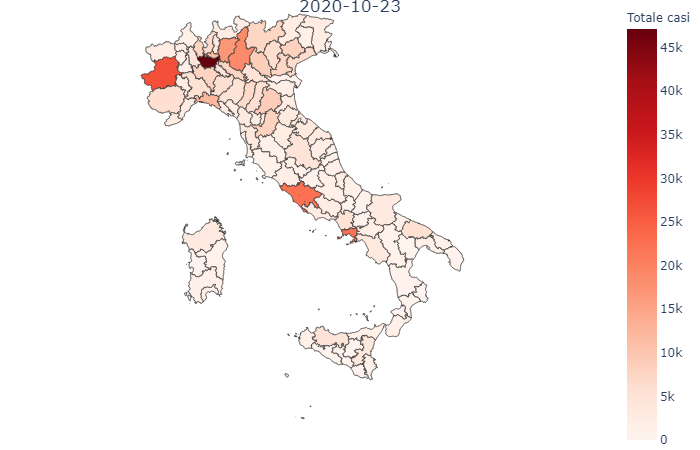

In [12]:
Visualizer.choropleth_go(
    df=df_p,
    geojson=map_json_p,
    locations='denominazione_provincia', 
    color='totale_casi',
    featureidkey='properties.prov_name',
    colorbar_title='Totale casi',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'totale_casi_p'},
    interactive=interactive)